# Word2Vec (Skipgram model)


Word2Vec offers two distinct models: Skip-gram and Continuous Bag of Words (CBOW). In our current implementation, we focus on the Skip-gram model. The Skip-gram model is elegantly simple, comprising of a neural network with a single hidden layer. Within this model, the hidden layer's weights is the holy grail we seek. The weights are basically the real vector representations of words within our text corpus.

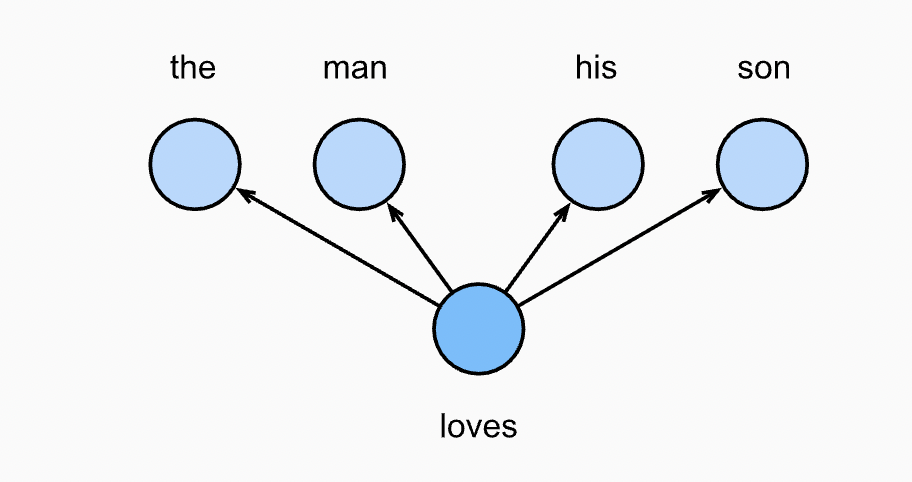

The Skipgram model works on the principle of predicting the context words for a given center word.
For eg; in the above example; given the word "loves". The model predicts two words to the left and right of the center word. Why only two ?  

The number of context words to be predicted can be specified by a parameter known as "Context window". Here, the context window is set to 2. Hence the two words.

The model is basically predicting the conditional probability of generating the context words. But as stated earlier, out main task is knowing the updated weights. As it is a supervised learning model, the target values are the input-context pairs that are found in our text corpus. We train the model accordingly, then use backpropogation to learn and output the weights.

# Let's implement the concept of Skipgram model !

In [ ]:
text = '''The goal of this task is to experiment and create word embeddings \
based on the given sentences and the context \
The baseline model provided is itself is done with TF-IDF \
one of the most primitive ways of creating embeddings out of a given corpora of text \
Firstly, it should be very evident by going through the notebook \
that the embedding process is not scalable, and is subject to being skewed \
You are expected to try out improvements over the current method of embedding \
through code and document the same. For each set of embeddings created \
you are expected to create a csv file with word-embedding \
pairs and upload the same in your repository. '''
# The text is from the task 2A statement itself.

In [ ]:
"""The first step is to tokenize the text.
Tokenizing meaning : Splitting the larger text corpus into smaller words without punctuations
and other special characters."""

import re

def tokenize(text):
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())

In [ ]:
tokens = tokenize(text)

In [ ]:
"""Here, we are creating a lookup table that helps us easily to convert between words to indices & vice-versa easily.
This becomes essential further in the code when we are gonna use one-hot encoding.

But, what is a lookup table ? It's basically a dictionary object which contains the relationship,
between the words and indices."""

def mapping(tokens):
    word_to_id = {}
    id_to_word = {}

    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token

    return word_to_id, id_to_word

In [ ]:
word_to_id, id_to_word = mapping(tokens)
word_to_id

# Verifying the lookup table.

{'baseline': 0,
 'corpora': 1,
 'pairs': 2,
 'task': 3,
 'try': 4,
 'itself': 5,
 'done': 6,
 'ways': 7,
 'one': 8,
 'same': 9,
 'very': 10,
 'expected': 11,
 'current': 12,
 'each': 13,
 'this': 14,
 'with': 15,
 'through': 16,
 'not': 17,
 'of': 18,
 'notebook': 19,
 'primitive': 20,
 'creating': 21,
 'skewed': 22,
 'for': 23,
 'goal': 24,
 'word': 25,
 'a': 26,
 'by': 27,
 'created': 28,
 'it': 29,
 'repository': 30,
 'method': 31,
 'file': 32,
 'are': 33,
 'context': 34,
 'should': 35,
 'based': 36,
 'idf': 37,
 'tf': 38,
 'that': 39,
 'model': 40,
 'evident': 41,
 'embeddings': 42,
 'improvements': 43,
 'experiment': 44,
 'create': 45,
 'upload': 46,
 'given': 47,
 'provided': 48,
 'and': 49,
 'embedding': 50,
 'document': 51,
 'most': 52,
 'in': 53,
 'out': 54,
 'text': 55,
 'firstly': 56,
 'scalable': 57,
 'going': 58,
 'sentences': 59,
 'set': 60,
 'the': 61,
 'on': 62,
 'being': 63,
 'csv': 64,
 'over': 65,
 'to': 66,
 'is': 67,
 'code': 68,
 'you': 69,
 'process': 70,
 'subje

In [ ]:
"""Tokenizing is done. Now, we have to generate the training data.
Training data is required in order for the model to understand the affinity between different words.
We basically iterate over the tokenized data and generate pairs.
One technicality here is that, for the first and last few tokens,
it may not be possible to obtain words to the left or right of that input token. """





import numpy as np

np.random.seed(42)


def generate_training_data(tokens, word_to_id, window):
    X = []
    y = []
    n_tokens = len(tokens)

    for i in range(n_tokens):
        idx = concat(
            range(max(0, i - window), i),
            range(i, min(n_tokens, i + window + 1))
        )
        for j in idx:
            if i == j:
                continue
            X.append(one_hot_encode(word_to_id[tokens[i]], len(word_to_id)))
            y.append(one_hot_encode(word_to_id[tokens[j]], len(word_to_id)))

    return np.asarray(X), np.asarray(y)

In [ ]:
def concat(*iterables):
    for iterable in iterables:
        yield from iterable

In [ ]:
# Performing One-hot Encoding
def one_hot_encode(id, vocab_size):
    res = [0] * vocab_size
    res[id] = 1
    return res

In [ ]:
X, y = generate_training_data(tokens, word_to_id, 2)

In [ ]:
print(X.shape)
print(y.shape)

#Total number of training examples. = 554
#Number of features = 89 (number of unique words in the corpus).

(454, 74)
(454, 74)


# Neural Network Architecture


**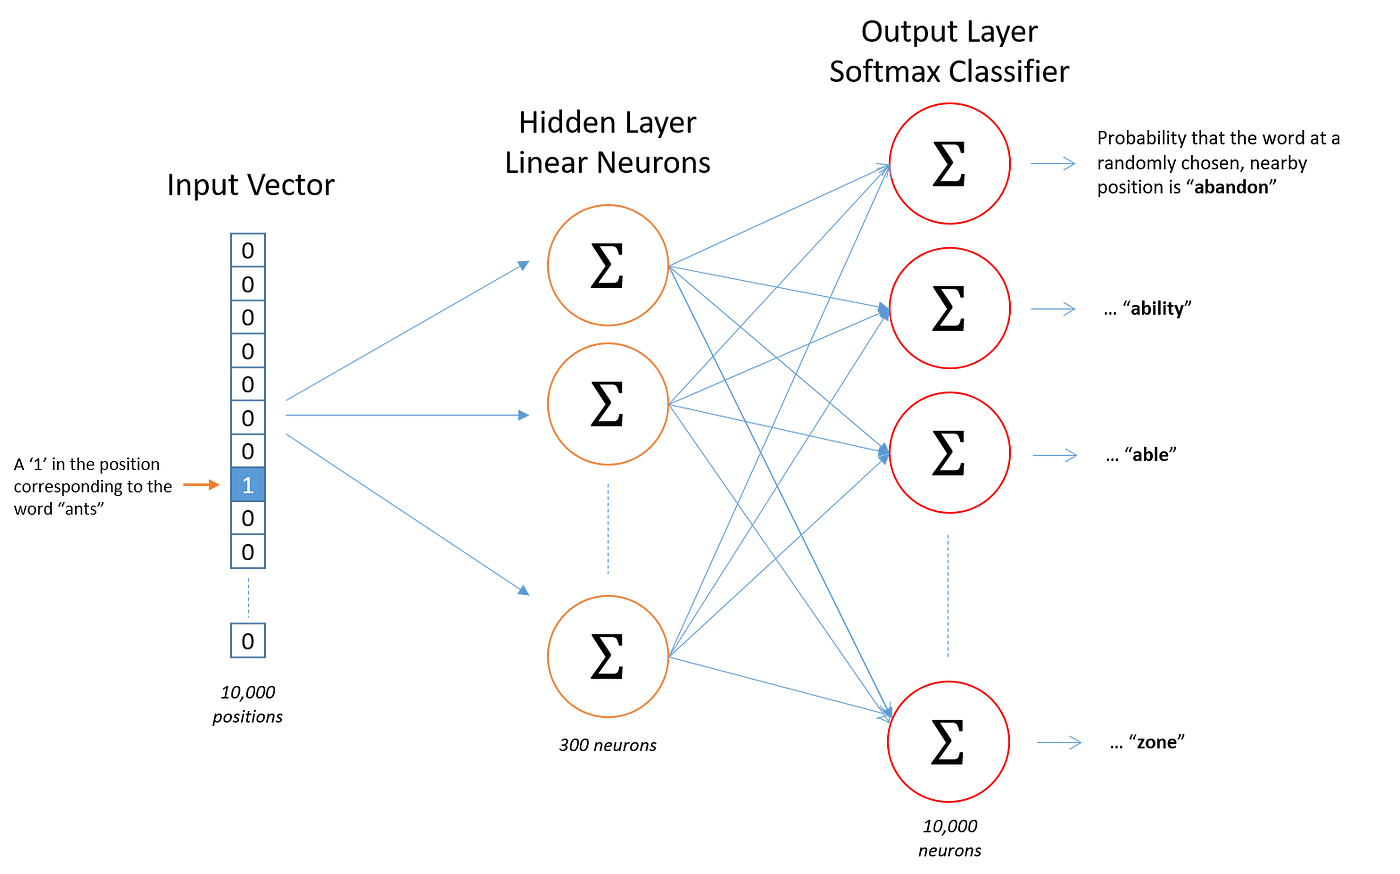

This is a rough visual representation of how the neural network architecture looks like. Our neural network has a similar structure apart from the fact, that we have the scaled-down version of the above architecture.

• The weight matrix effectively acts as a lookup table that moves one-hot encoded vectors to dense vectors in a different dimension—more precisely, the row space of the weight matrix. This is exactly what we want to achieve with embedding: representing words as dense vectors(or full length vectors).

a step-up from simple one-hot encoding.

Now, there's a question that begs to be answered is; Why not simply hot encode ?

• One-hot encoding alone doesn't take into account the semantic relationships between different word pairs. Basically, they cannot accurately describe the cosine similarity between different words.



 This process is exactly what embedding is: as we start training this model with the training data generated above, we would expect the row space of this weight matrix to encode meaningful semantic information from the training data.

In [ ]:
def init_network(vocab_size, n_embedding):
    model = {
        "w1": np.random.randn(vocab_size, n_embedding),
        "w2": np.random.randn(n_embedding, vocab_size)
    }
    return model


In [ ]:
model = init_network(len(word_to_id), 10)

In [ ]:
# Implementing Forward propogation

def forward(model, X, return_cache=True):
    cache = {}

    cache["a1"] = X @ model["w1"]
    cache["a2"] = cache["a1"] @ model["w2"]
    cache["z"] = softmax(cache["a2"])

    if not return_cache:
        return cache["z"]
    return cache

In [ ]:
# Softmax activation function

def softmax(X):
    res = []
    for x in X:
        exp = np.exp(x)
        res.append(exp / exp.sum())
    return res

In [ ]:
# Implementing Back-propogation

def backward(model, X, y, alpha):
    cache  = forward(model, X)
    da2 = cache["z"] - y
    dw2 = cache["a1"].T @ da2
    da1 = da2 @ model["w2"].T
    dw1 = X.T @ da1
    assert(dw2.shape == model["w2"].shape)
    assert(dw1.shape == model["w1"].shape)
    model["w1"] -= alpha * dw1
    model["w2"] -= alpha * dw2
    return cross_entropy(cache["z"], y)

In [ ]:
# Loss function

def cross_entropy(z, y):
    return - np.sum(np.log(z) * y)

<ipython-input-72-9bfb31c02f58>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


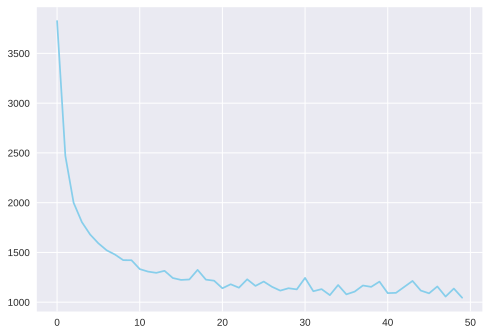

In [ ]:
# Visualizing the training process.

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn")

n_iter = 50
learning_rate = 0.05

history = [backward(model, X, y, learning_rate) for _ in range(n_iter)]

plt.plot(range(len(history)), history, color="skyblue")
plt.show()


**The CROSS-ENTROPY loss has decreased after 50 epochs. Hence, this model can be successfully used to perform word-embeddings. **

In [ ]:
embeddings= one_hot_encode(word_to_id["embeddings"], len(word_to_id))
result = forward(model, [embeddings], return_cache=False)[0]

for word in (id_to_word[id] for id in np.argsort(result)[::-1]):
    print(word)

of
out
create
creating
created
word
you
on
set
with
improvements
most
one
expected
it
primitive
based
text
to
your
over
firstly
a
that
current
skewed
are
ways
corpora
subject
tf
embeddings
pairs
experiment
method
context
idf
file
upload
repository
sentences
try
document
goal
in
done
should
being
be
task
given
very
process
this
provided
through
csv
notebook
by
same
going
model
the
baseline
and
itself
embedding
code
scalable
for
each
evident
not
is


In [ ]:
model["w1"]

array([[ 6.77520249e-01, -7.00758966e-01,  8.32787222e-01,
         2.59876245e+00, -2.13768532e+00,  1.64747295e-01,
        -1.93303683e-01,  1.14679517e-01, -1.11668877e+00,
         3.79284013e-01],
       [ 4.17380446e-01,  1.19571190e-01, -1.82153478e+00,
        -6.78530663e-01,  7.31774330e-01,  1.97109743e+00,
        -9.26872453e-01, -1.37703402e+00,  9.55501136e-01,
         2.48478662e-02],
       [ 4.22967539e-01,  1.22421398e+00, -7.32858026e-01,
         5.98441192e-01, -7.31349872e-01, -4.07809359e-01,
         7.90334643e-01,  1.34981575e+00, -1.64391289e+00,
        -1.38558302e+00],
       [-3.07299564e-01,  1.23566632e+00, -5.69919460e-01,
        -5.19317653e-01, -2.66851800e-01, -1.24976295e+00,
        -1.23819073e+00, -2.62874726e+00, -3.06574546e-01,
         1.90107803e-01],
       [-8.81842254e-01,  1.37049175e+00, -1.11032147e+00,
         2.83352378e-01, -3.80818462e-01, -6.86010349e-01,
        -7.91694704e-01,  2.46536501e+00,  1.39521378e+00,
        -1.

In [ ]:
def get_embedding(model, word):
    try:
        idx = word_to_id[word]
    except KeyError:
        print("`word` not in corpus")
    one_hot = one_hot_encode(idx, len(word_to_id))
    return forward(model, one_hot)["a1"]

In [ ]:
get_embedding(model, "embeddings")


array([ 0.38482421,  0.79188741,  0.12036937,  0.23689612, -0.23241624,
        0.39666556,  0.00998423,  0.36135341,  1.71132699, -0.68487102])

In [ ]:
import pandas as pd


corpus = tokens
word_embedding_dict = {}

# Loop through the words in the corpus and get embeddings for each word
for word in corpus:
    try:
        idx = word_to_id[word]
        one_hot = one_hot_encode(idx, len(word_to_id))
        embedding = forward(model, one_hot)["a1"]
        # Store the word-embedding pair in the dictionary
        word_embedding_dict[word] = embedding
    except KeyError:
        print(f"`{word}` not in corpus")

# Create a DataFrame from the dictionary
df = pd.DataFrame(list(word_embedding_dict.items()), columns=["Word", "Embeddings"])

# Save the DataFrame to a CSV file
df.to_csv("corpus_embeddings.csv", index=False)

print("CSV file saved successfully.")


CSV file saved successfully.


In [ ]:
from google.colab import files
files.download("corpus_embeddings.csv")

# This code can be used to downlaod the csv file with the format (word, embeddings).

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>